In [1]:
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
import pandas as pd
df=pd.read_excel('/Users/ianfla/Desktop/Others/weight/weight.xlsx',engine='openpyxl',header=None)
t=df[2].values[0:-1]
w=df[1].values[0:-1]
goal=65

In [2]:
df.tail(8)

,0,1,2
117,210323,76.1,129.0
118,210324,75.4,130.0
119,210325,75.3,131.0
120,210326,75.7,132.0
121,210327,75.6,133.0
122,210328,75.6,134.0
123,210329,75.7,135.0
124,210330,NaN,NaN


In [3]:
X=sm.add_constant(t)
y=w
memory=10
fit=sm.WLS(y,X,weights=np.exp(-(t[-1]-t)/memory)).fit()
alpha,beta=fit.params
T=-(alpha-goal)/beta

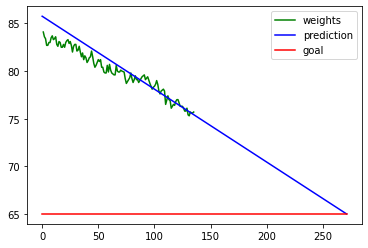

already lost: 16.8 catties
progress: 43.98%
remaining time: 136.16 days


In [4]:
if alpha>0 and beta<0:
    plt.plot(t,w,c='g',label='weights')
    plt.plot([0,T],[alpha,goal],c='b',label='prediction')
    plt.plot([0,T],[goal,goal],c='r',label='goal')
    plt.legend()
    plt.show()
    p=(w[0]-w[-1])/(w[0]-goal)
    print('already lost:',round(2*(w[0]-w[-1]),ndigits=2),'catties')
    print('progress:',str(round(p*100,ndigits=2))+'%')
    print('remaining time:',round(T-t[-1],ndigits=2),'days')
else:
    print('Your weight is going up!!!')

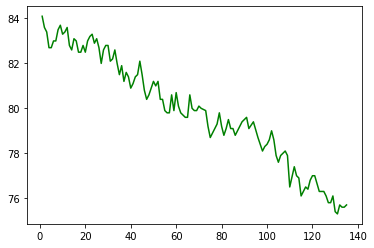

In [5]:
plt.plot(t,w,c='g')
plt.show()